In [79]:
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [80]:
def initialize_grid(n, empty_ratio, blue_ratio, red_ratio):
    """Инициализация сетки случайным образом."""
    num_cells = n * n
    num_empty = int(empty_ratio * num_cells)
    num_blue = int(blue_ratio * num_cells)
    num_red = num_cells - num_empty - num_blue

    # Создаем список с клетками
    grid = [0] * num_empty + [1] * num_blue + [2] * num_red
    random.shuffle(grid)
    # Преобразуем в двумерный массив
    return np.array(grid).reshape((n, n))

In [81]:
def count_same_neighbors(grid, x, y):
    """Подсчет количества соседей того же цвета."""
    n = grid.shape[0]
    color = grid[x, y]

    if color == 0:
        return 0  # Пустая клетка не может быть "счастлива"

    # Соседние позиции
    neighbors = [
        (x - 1, y - 1), (x - 1, y), (x - 1, y + 1),
        (x, y - 1),             (x, y + 1),
        (x + 1, y - 1), (x + 1, y), (x + 1, y + 1)
    ]

    same_color_count = 0
    for nx, ny in neighbors:
        if 0 <= nx < n and 0 <= ny < n and grid[nx, ny] == color:
            same_color_count += 1

    return same_color_count

In [82]:
def is_happy(grid, x, y, threshold):
    """Проверка, счастлива ли клетка."""
    return count_same_neighbors(grid, x, y) >= threshold

def get_unhappy_cells(grid, threshold):
    """Получение списка несчастных клеток."""
    unhappy_cells = []
    for x in range(n):
        for y in range(n):
            if grid[x, y] != 0 and not is_happy(grid, x, y, threshold):
                unhappy_cells.append((x, y))
    return unhappy_cells

def get_empty_cells(grid):
    """Получение списка пустых клеток."""
    empty_cells = []
    for x in range(n):
        for y in range(n):
            if grid[x, y] == 0:
                empty_cells.append((x, y))
    return empty_cells

In [83]:
def move_unhappy_cells(grid, threshold):
    """Перемещение несчастных клеток в случайные пустые клетки."""
    unhappy_cells = get_unhappy_cells(grid, threshold)
    empty_cells = get_empty_cells(grid)

    if not unhappy_cells or not empty_cells:
        return grid, True  # Если нет несчастных или пустых клеток, ничего не делать

    for (x, y) in unhappy_cells:
        # Выбираем случайную пустую клетку
        new_x, new_y = random.choice(empty_cells)
        # Перемещаем клетку
        grid[new_x, new_y] = grid[x, y]
        grid[x, y] = 0  # Старая клетка становится пустой
        empty_cells.remove((new_x, new_y))  # Убираем использованную пустую клетку
        empty_cells.append((x, y))  # Добавляем старую позицию как пустую

    return grid, False

In [84]:
def plot_grid(grid, step):
    """Визуализация сетки."""
    plt.figure(figsize=(6, 6))
    plt.imshow(grid, cmap=ListedColormap(['white', 'blue', 'red']), vmin=0, vmax=2)
    plt.title(f"Step {step}")
    plt.colorbar(ticks=[0, 1, 2], label='Cell State')
    plt.show()

In [85]:
def simulate_segregation(grid, steps, threshold):
    plot_grid(grid, 0)
    """Моделирование сегрегации на заданное количество шагов."""
    for step in range(1, steps+1):
        grid, stop = move_unhappy_cells(grid, threshold)
        plot_grid(grid, step)
        if stop:
          break

In [103]:
n = 40  # Размер сетки n x n
empty_ratio = 0.30  # Доля пустых клеток
blue_ratio = 0.35  # Доля синих клеток
red_ratio = 0.35  # Доля красных клеток
threshold = 4  # Количество соседей того же цвета, чтобы клетка была "счастлива"

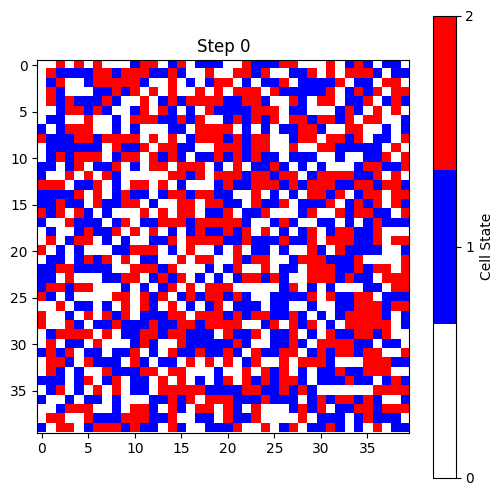

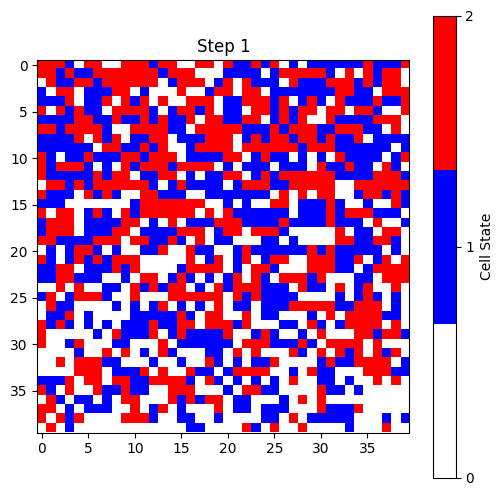

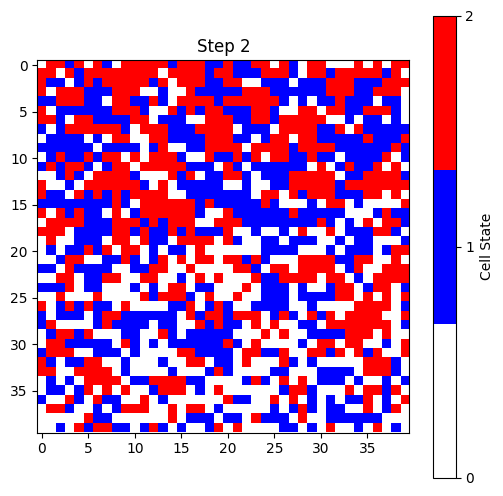

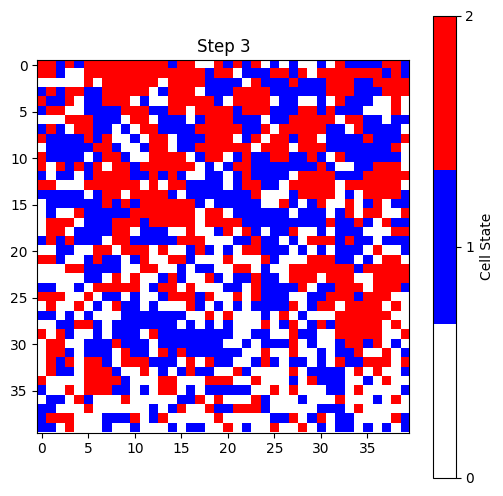

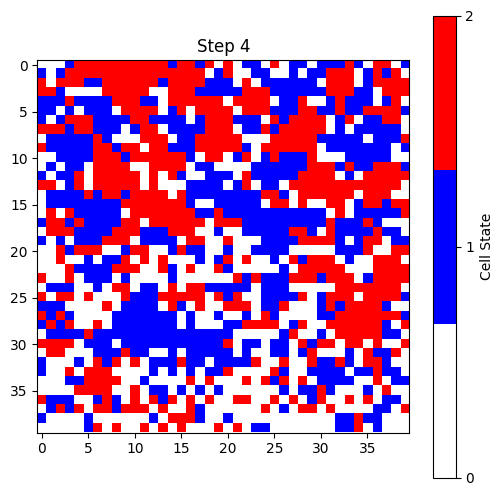

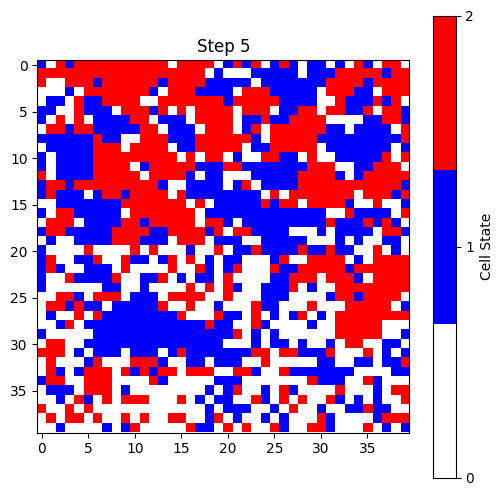

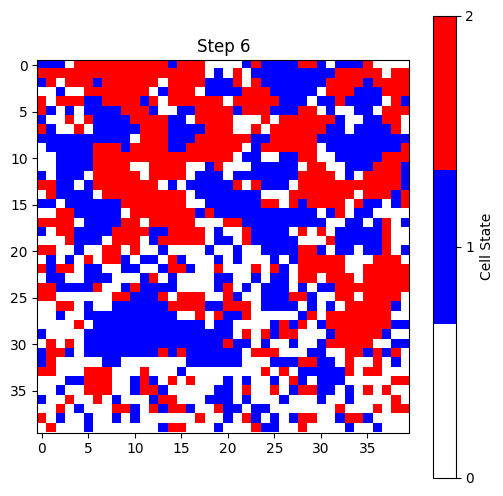

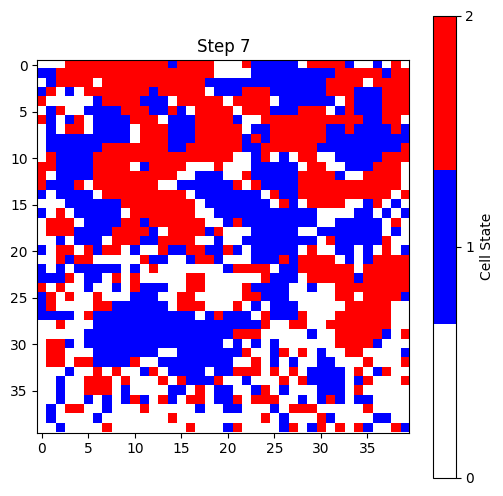

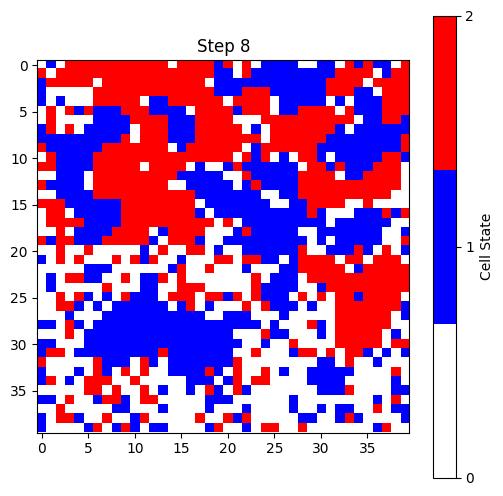

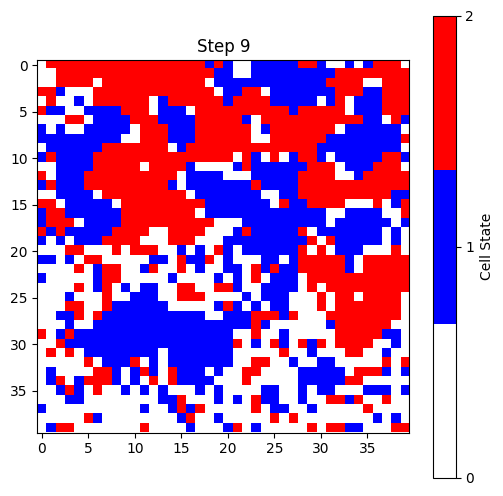

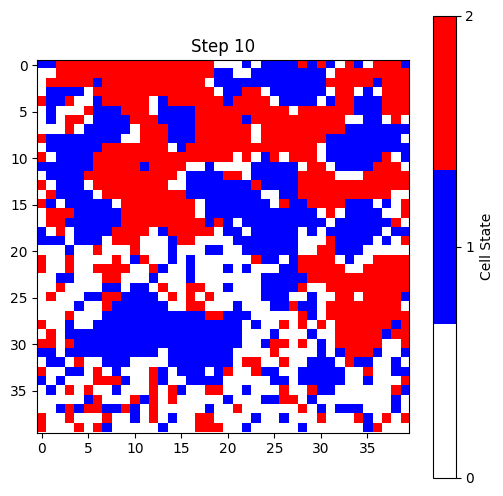

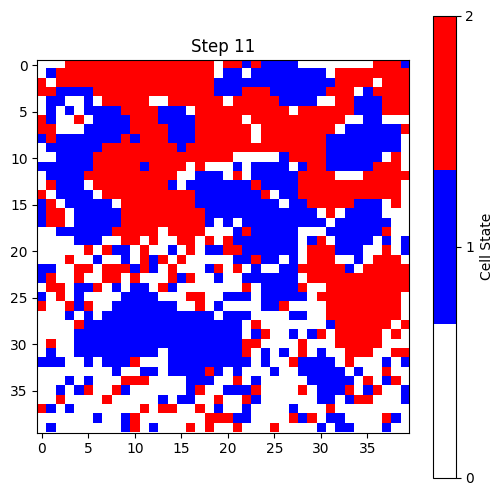

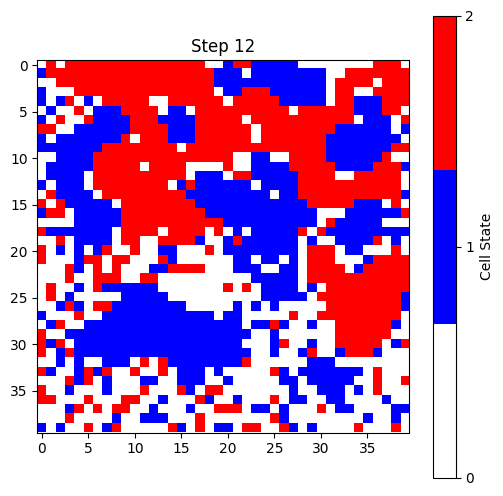

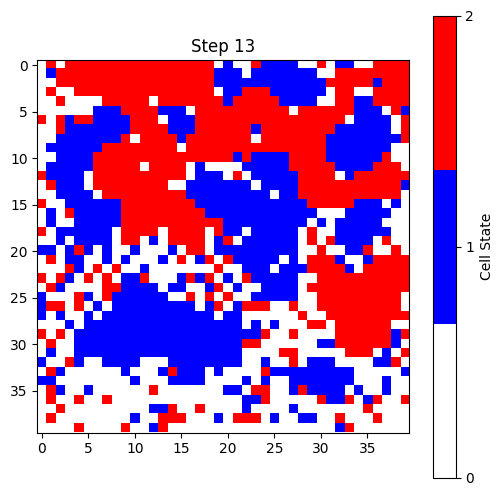

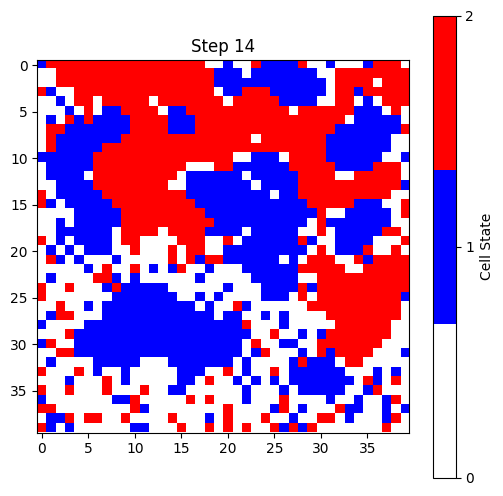

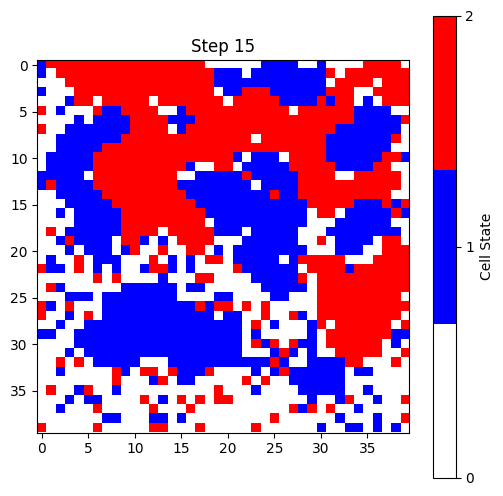

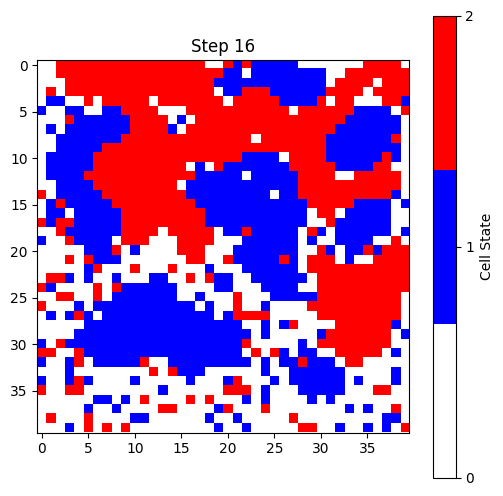

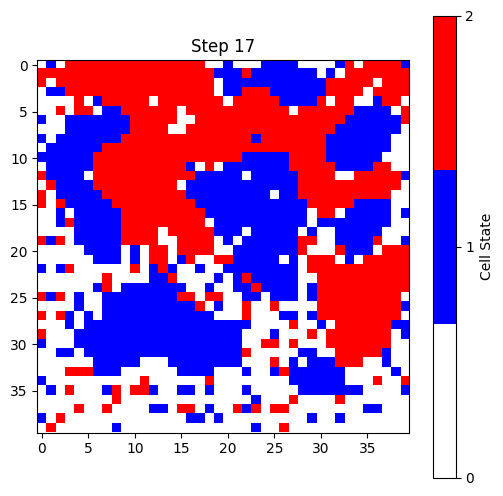

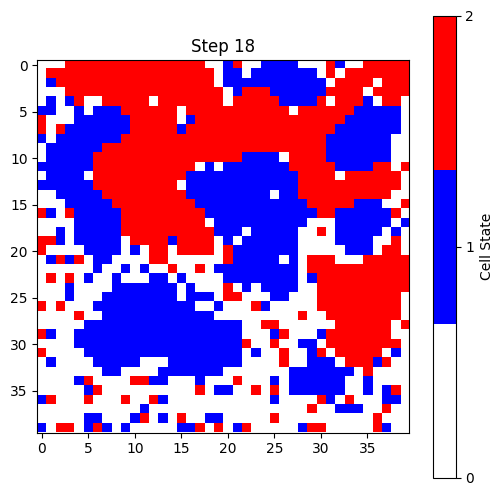

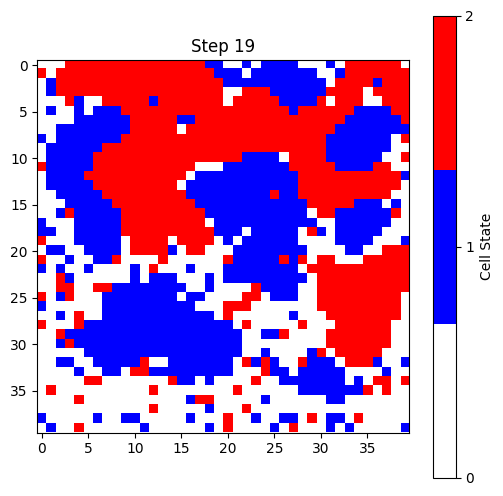

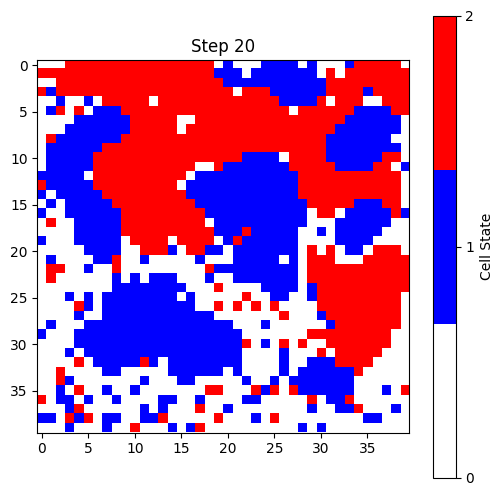

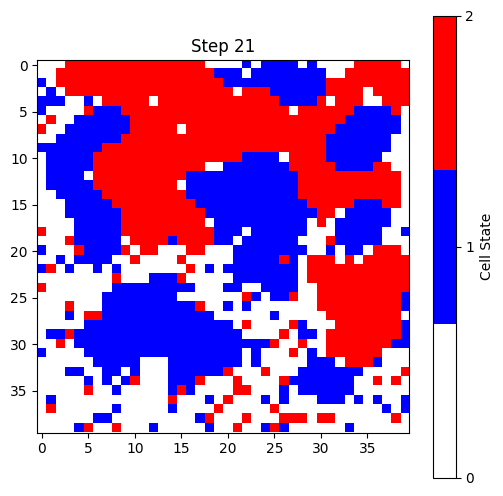

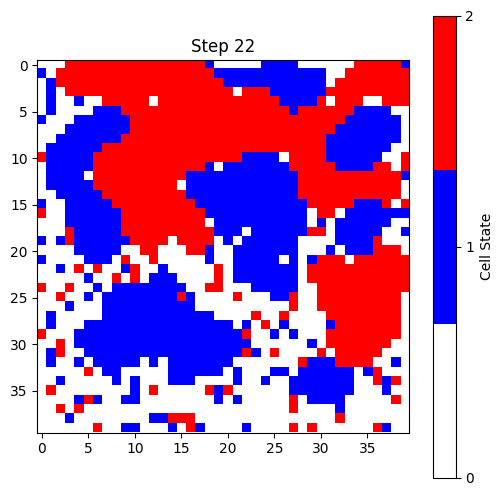

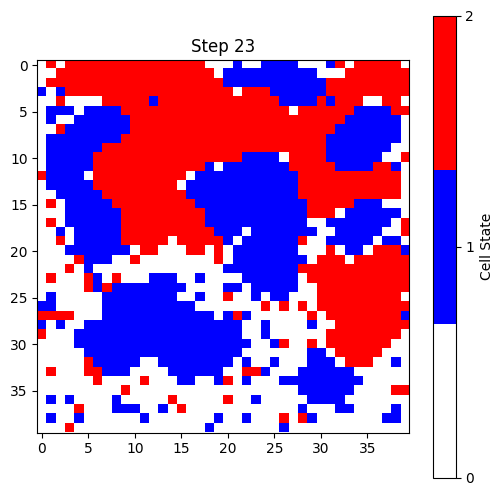

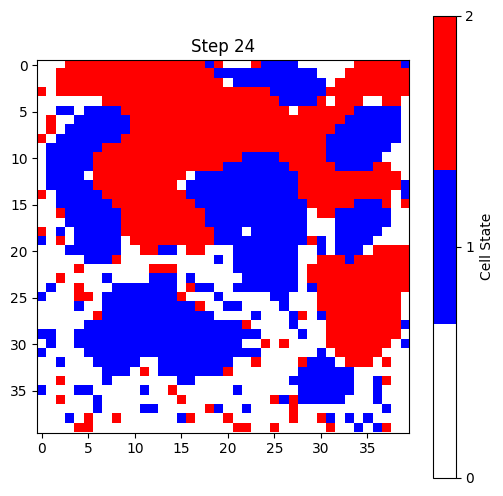

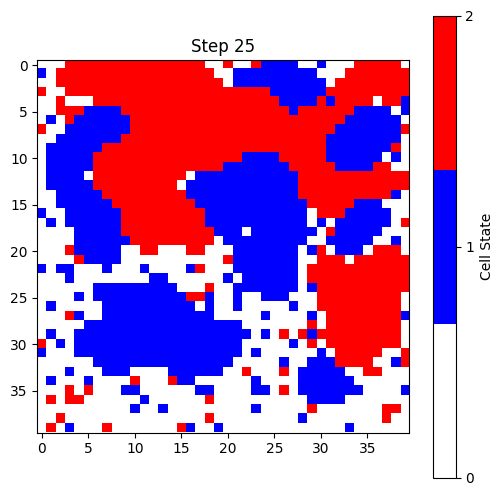

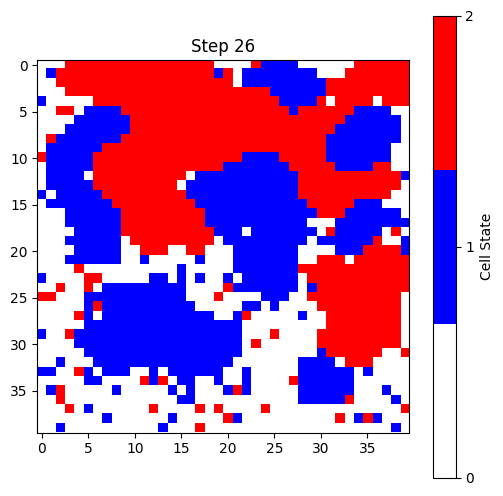

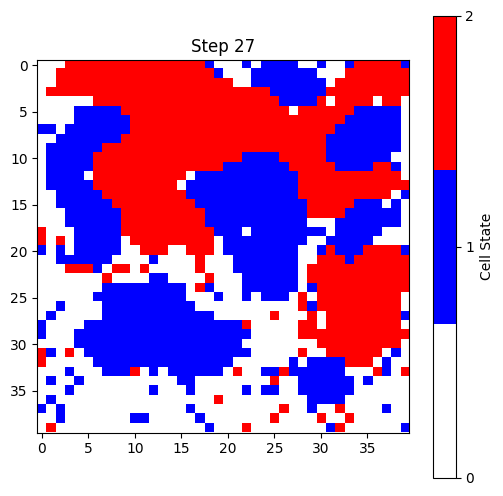

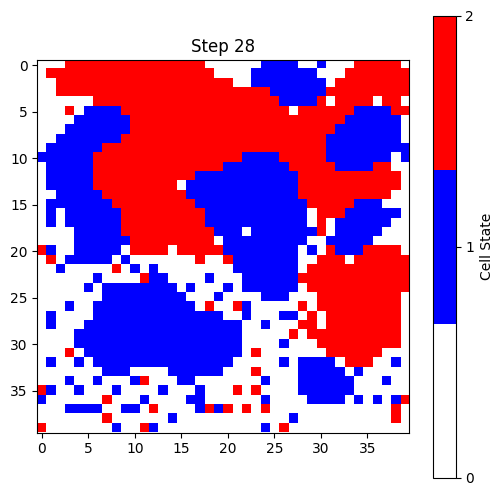

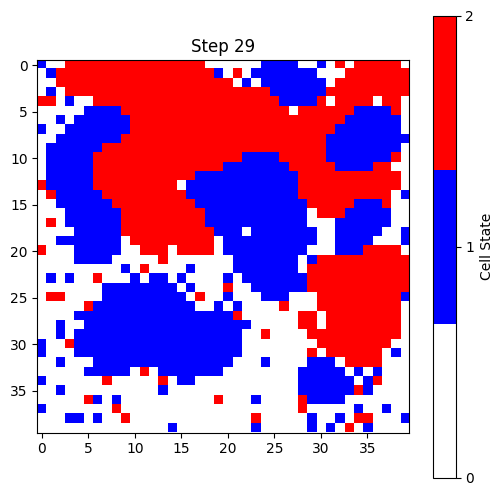

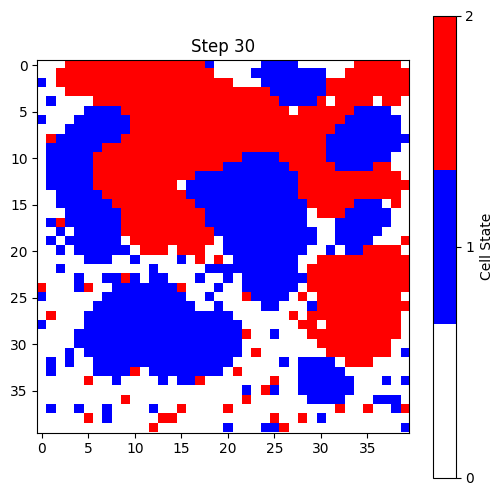

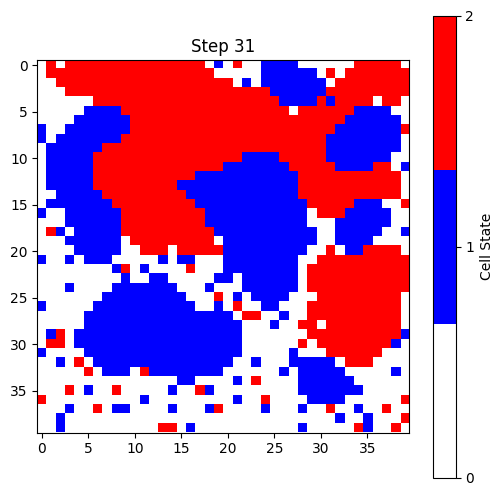

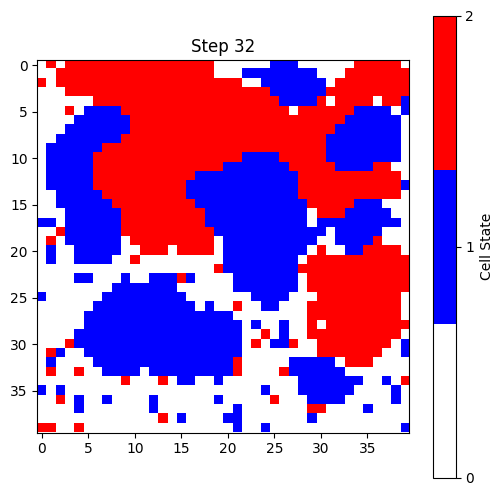

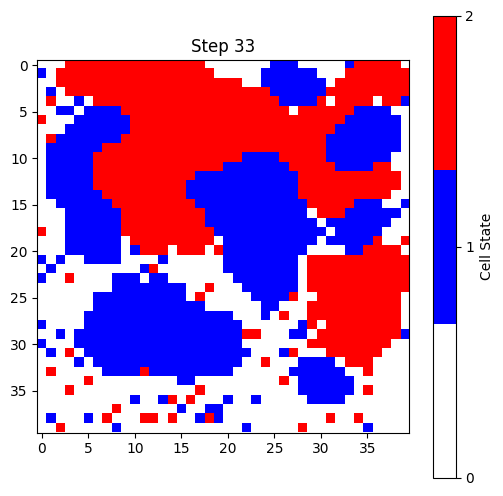

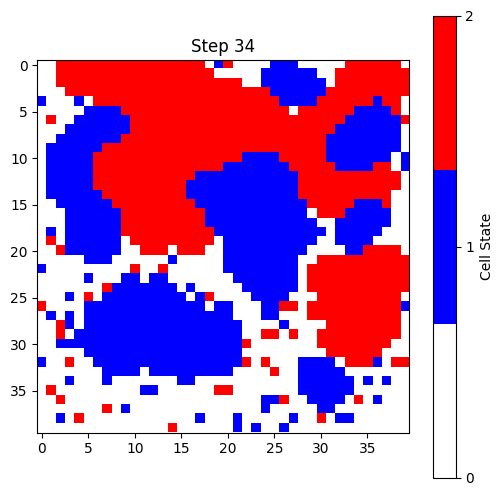

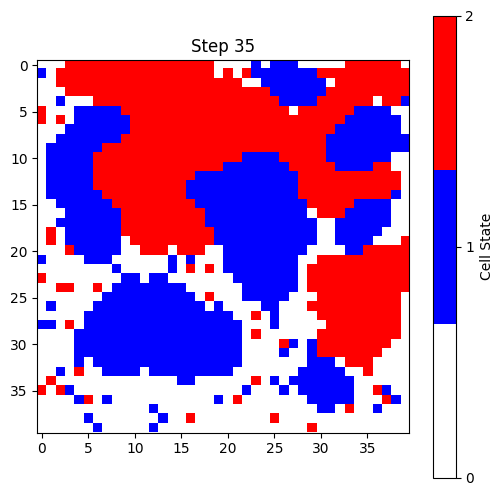

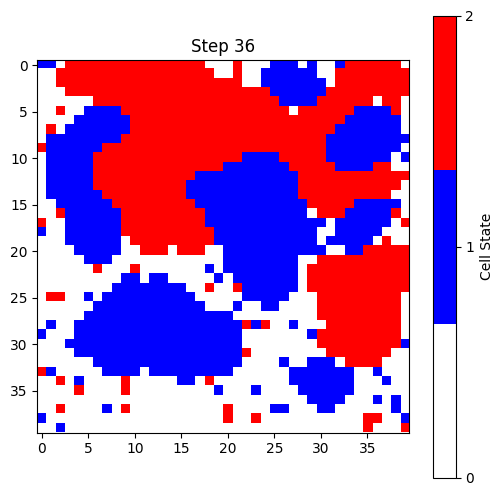

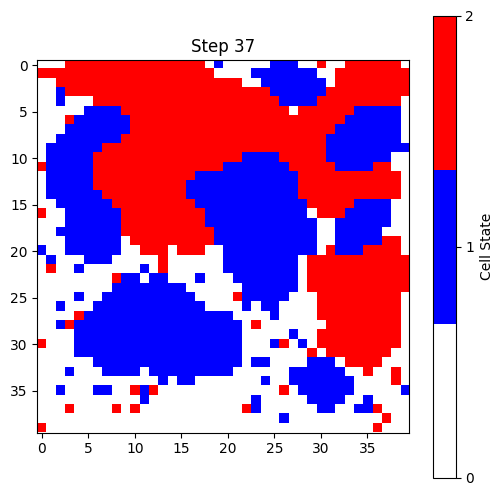

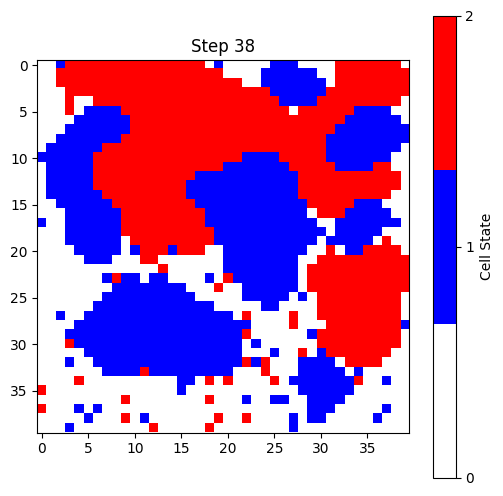

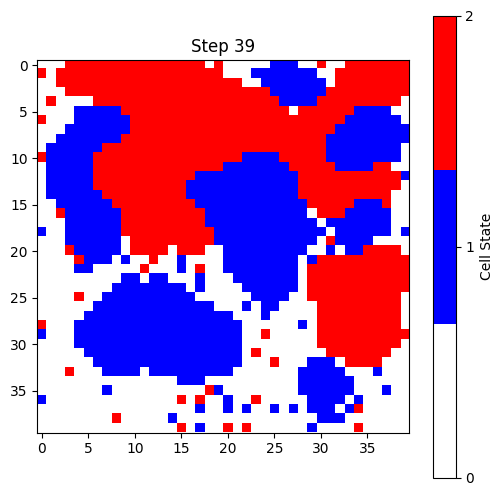

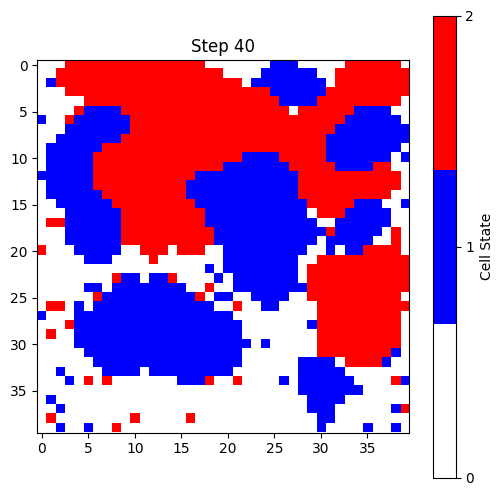

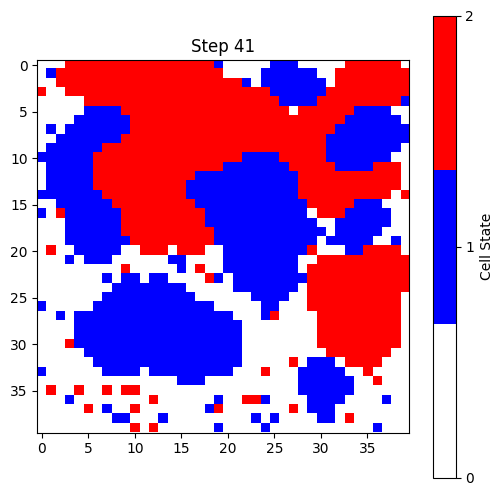

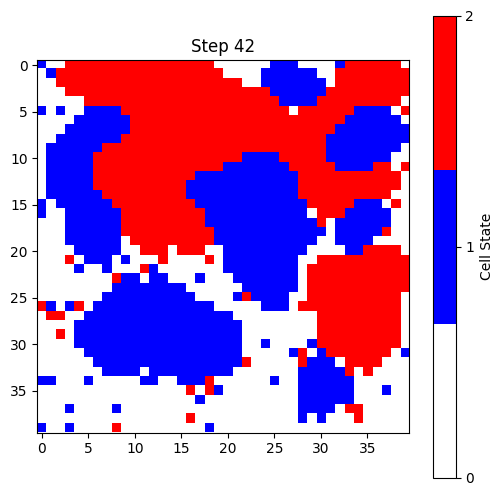

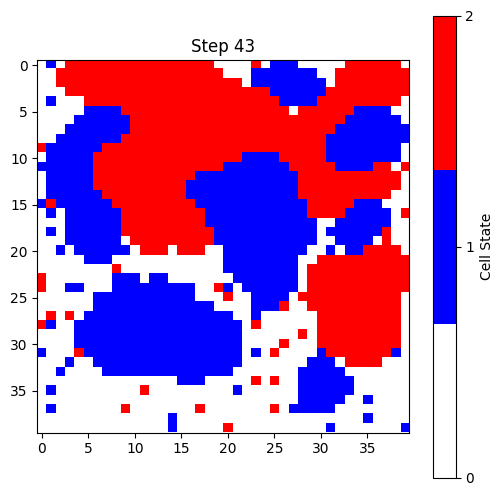

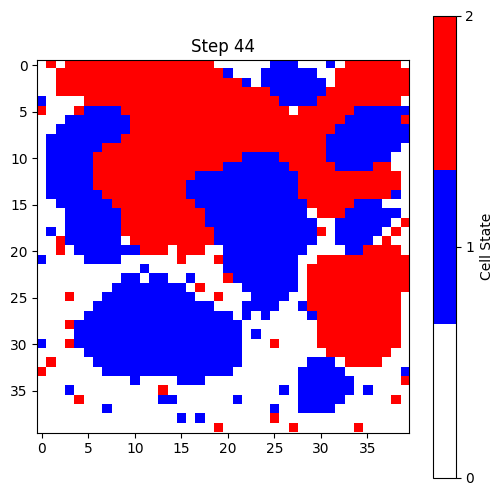

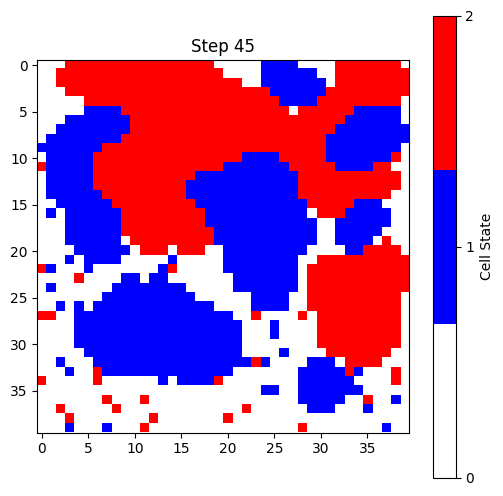

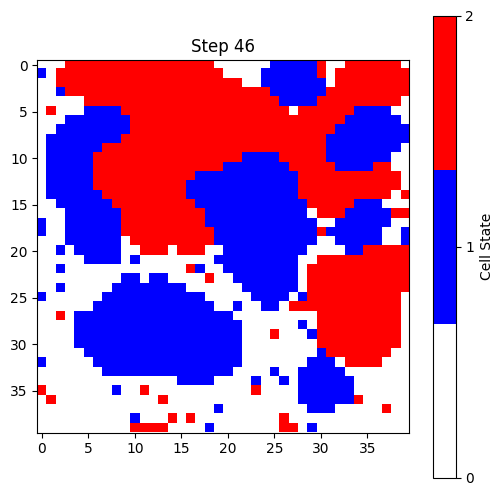

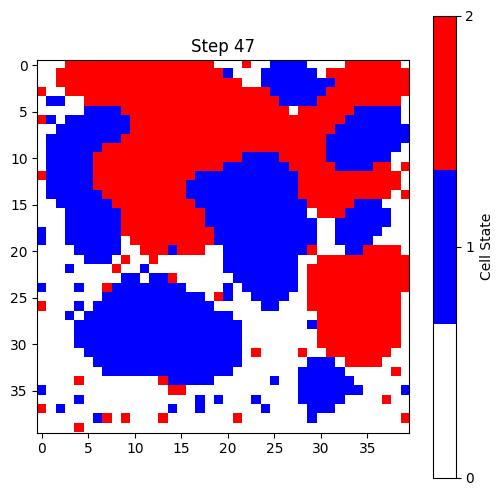

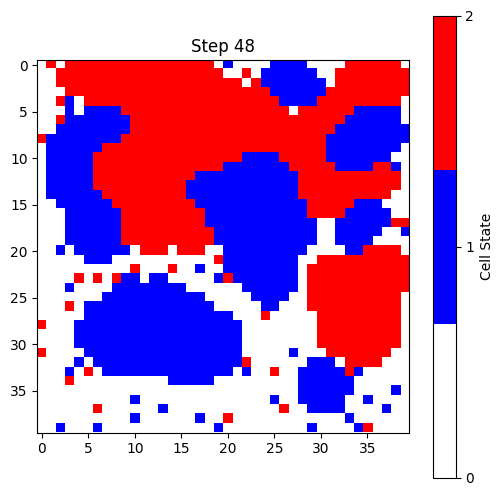

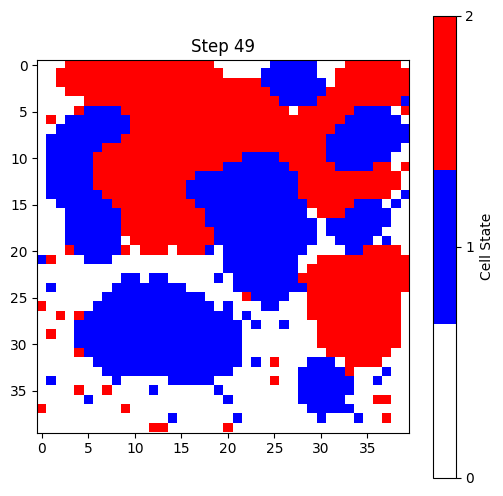

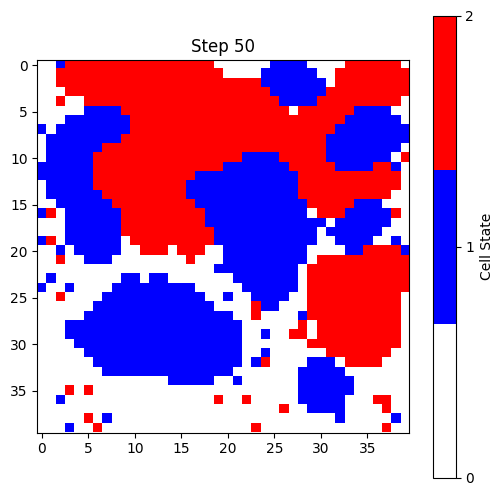

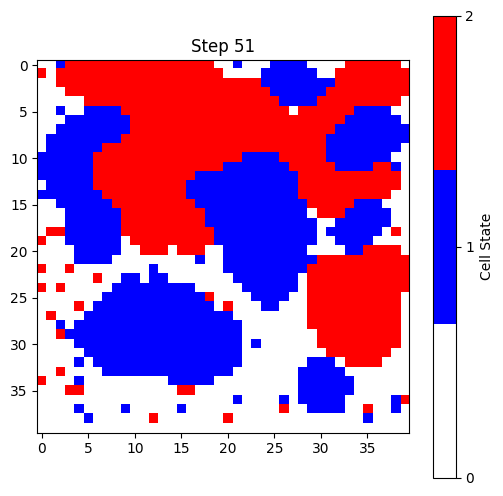

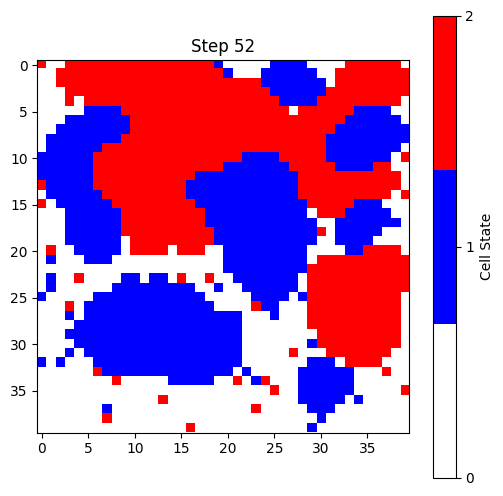

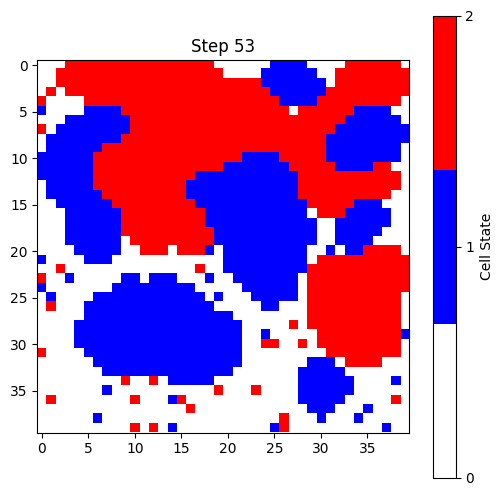

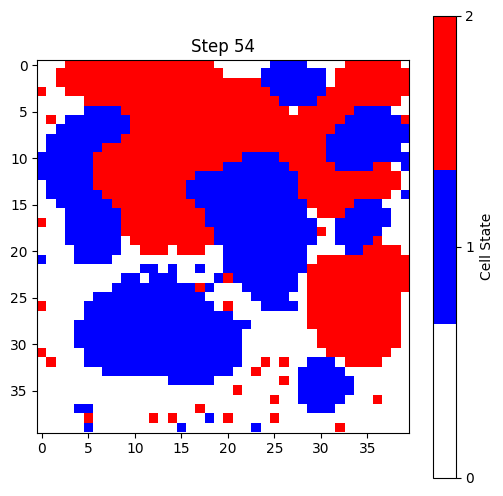

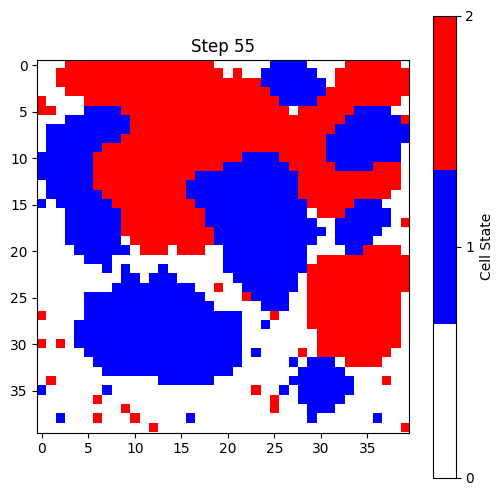

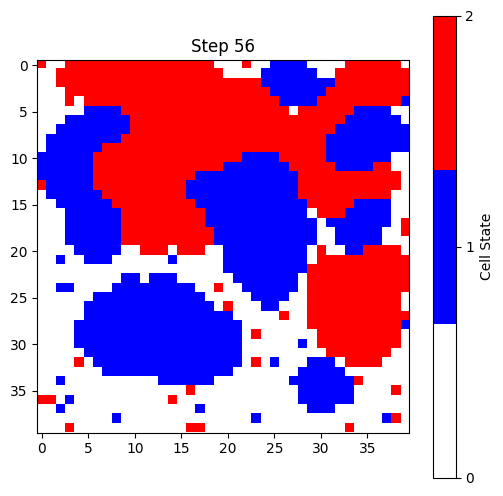

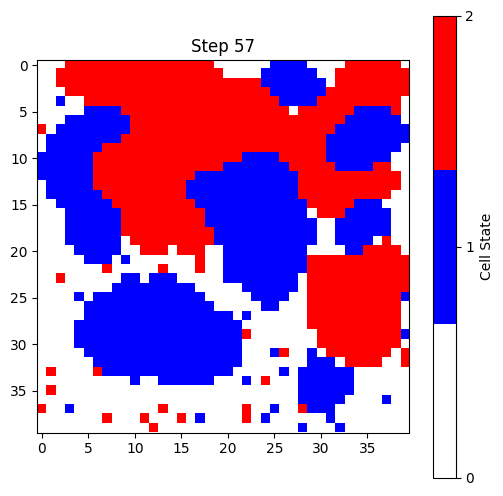

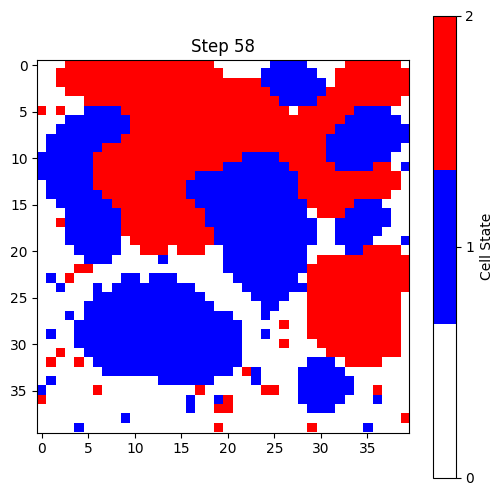

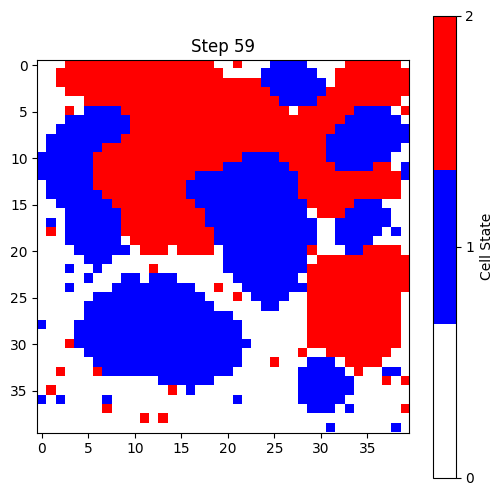

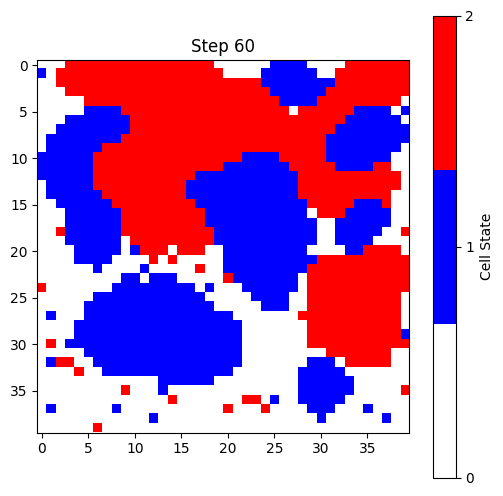

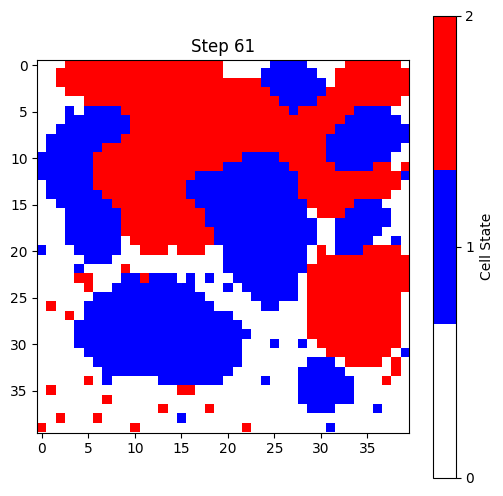

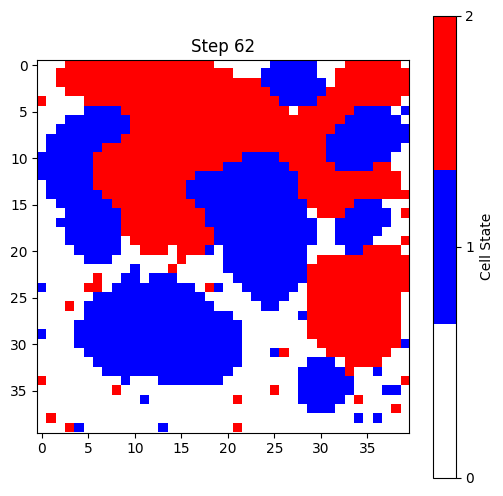

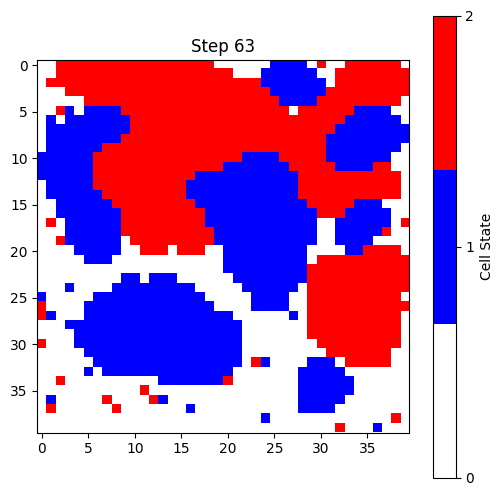

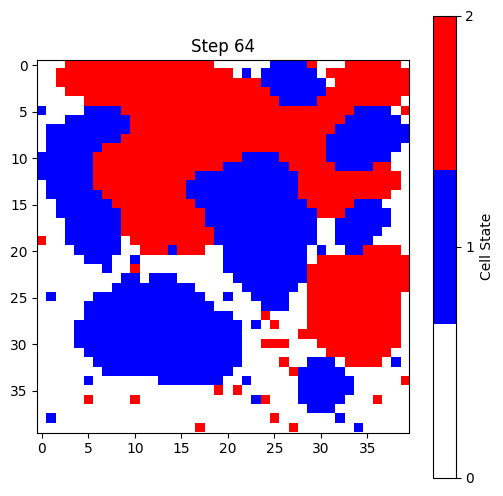

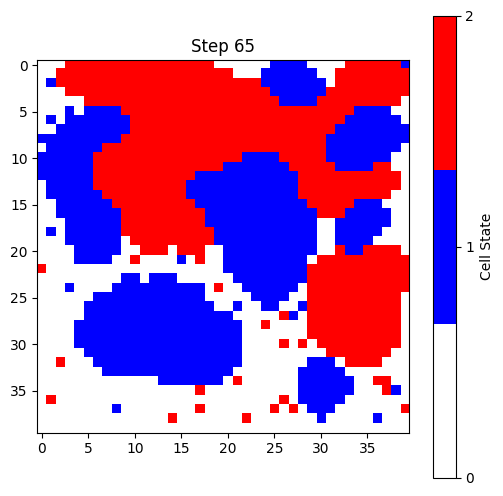

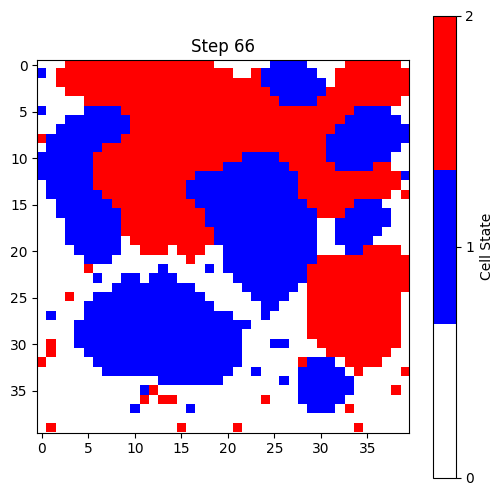

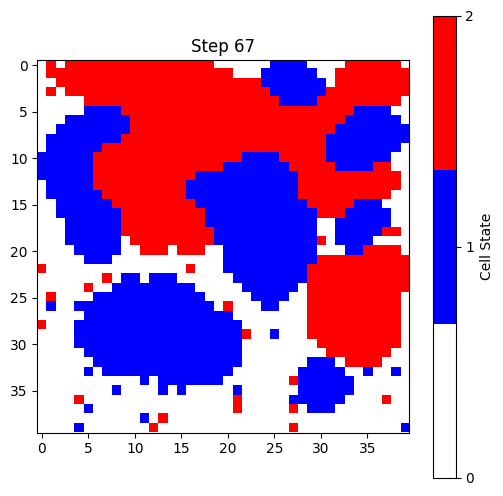

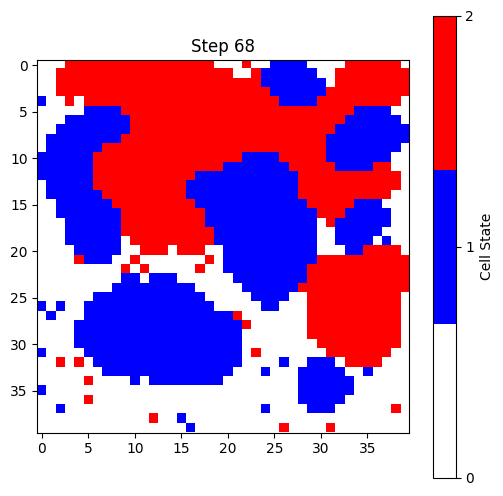

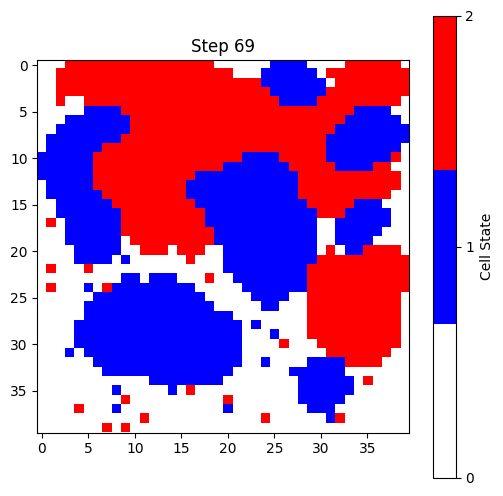

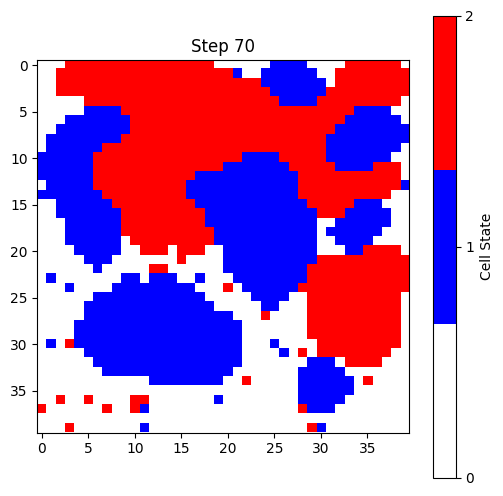

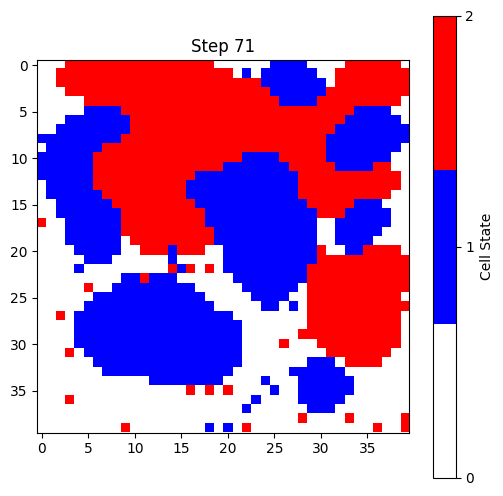

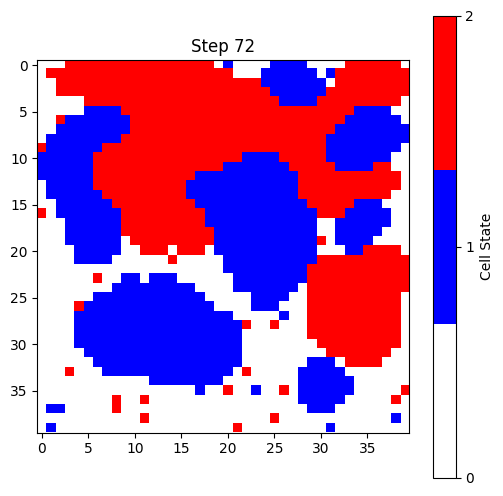

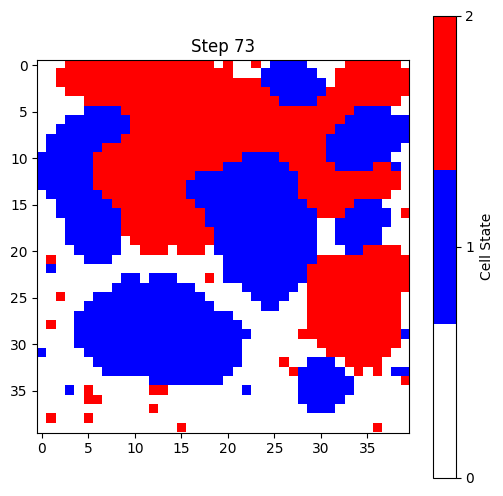

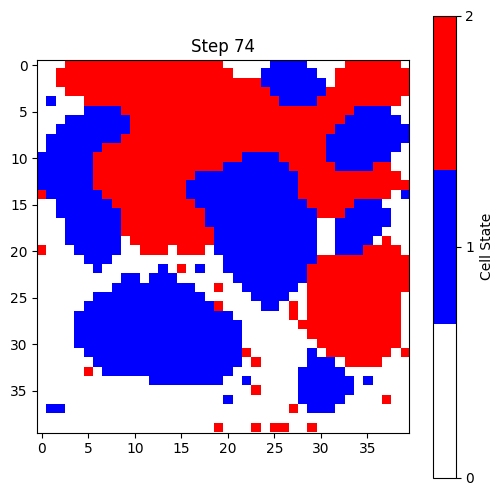

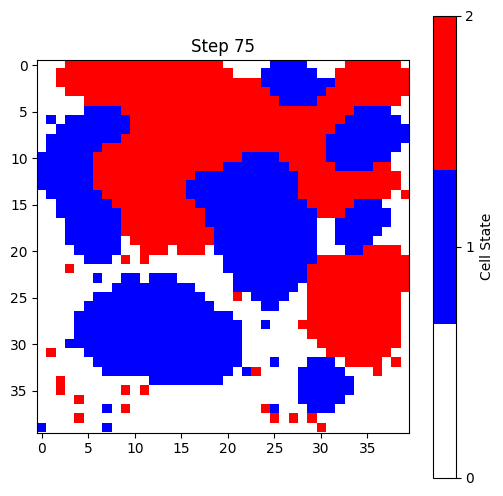

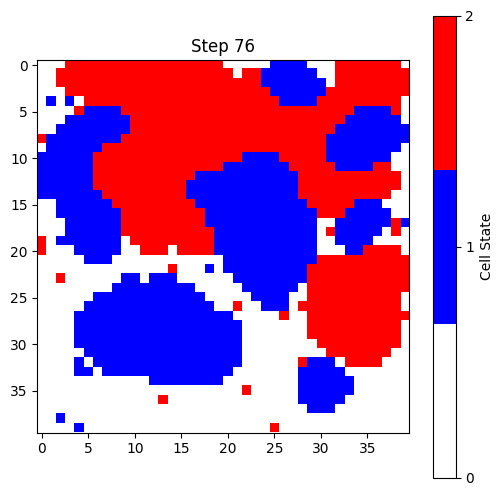

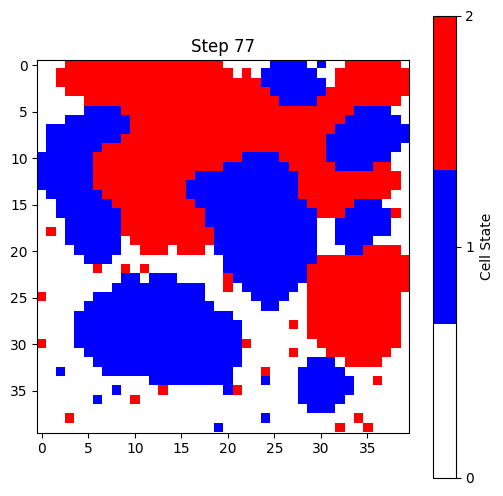

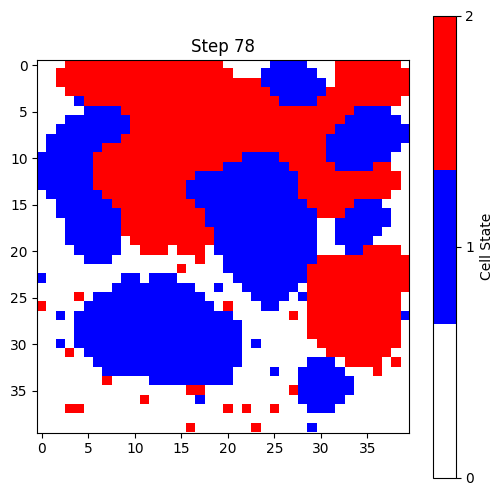

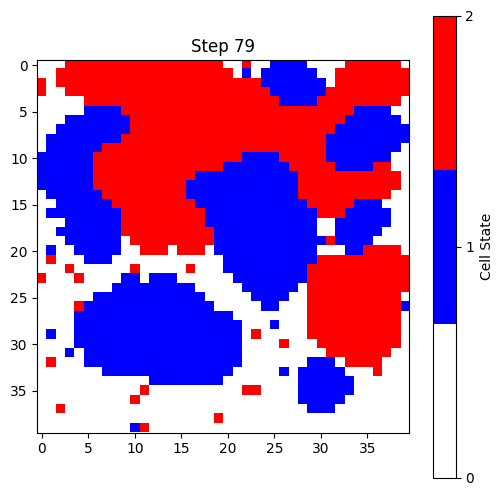

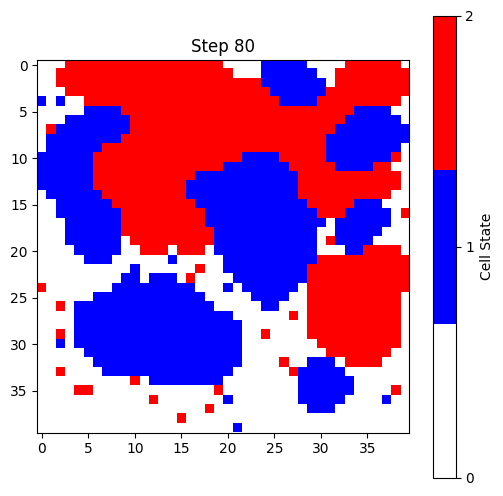

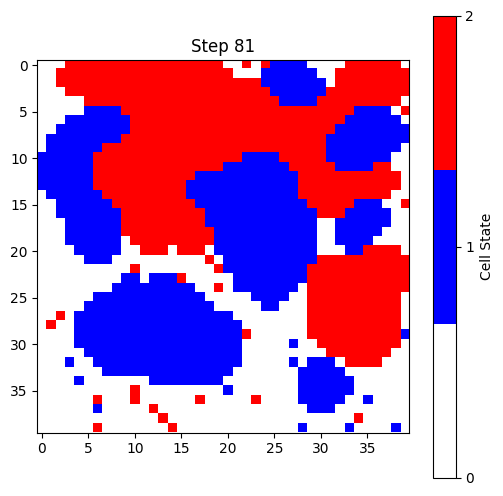

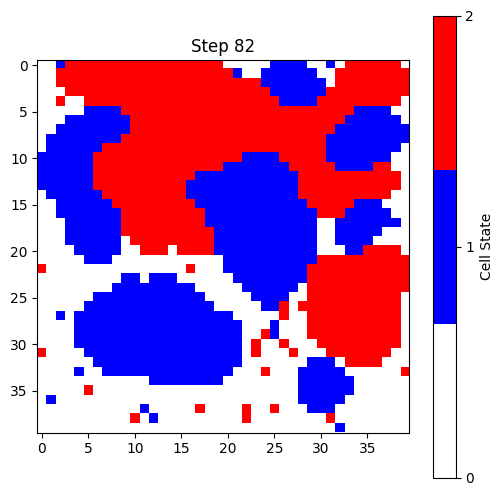

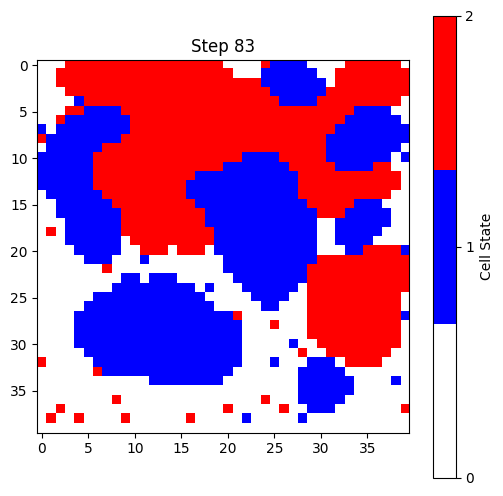

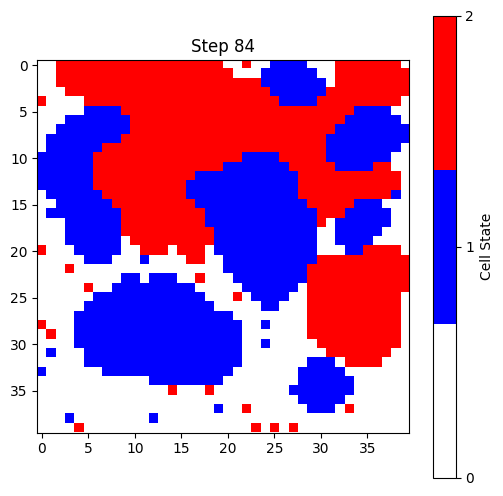

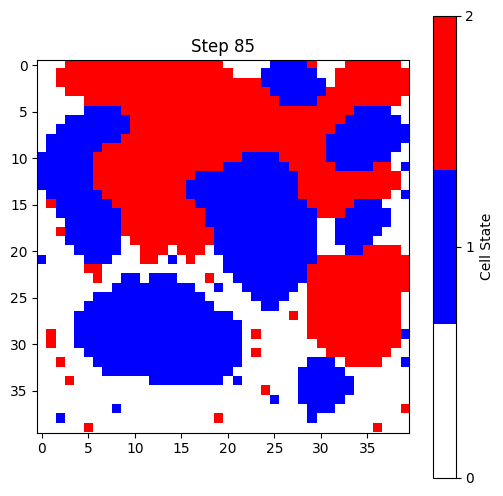

KeyboardInterrupt: 

In [105]:
# Инициализируем сетку
grid = initialize_grid(n, empty_ratio, blue_ratio, red_ratio)

# Количество шагов моделирования
steps = 100

# Запускаем моделирование
simulate_segregation(grid, steps, threshold)